In [76]:
# pip install xgboost
# !pip install lightgbm

In [1]:
import cx_Oracle
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from matplotlib import rc
rc("font", family = "Malgun Gothic")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, r2_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import mean_squared_error, mean_squared_log_error 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor



import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression

In [3]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

In [4]:
from sklearn.model_selection import GridSearchCV

In [5]:
def get_rmsle(model):
    pred = model.predict(X_test)
    pred = np.expm1(pred)  # 로그 역변환 (inverse log transformation)
    y_test_exp = np.expm1(y_test)  # 로그 역변환 (inverse log transformation)
    rmsle = np.sqrt(mean_squared_log_error(y_test_exp, pred))
    print(f"{model.__class__.__name__} RMSLE: {np.round(rmsle, 3)}")
    return rmsle

def get_rmsles(models):
    rmsles = []
    for model in models:
        rmsle = get_rmsle(model)
        rmsles.append(rmsle)
    return rmsles

In [6]:
def compare_arrays(arr1, arr2):
    count = 0
    for i in range(len(arr1)):
        if arr1[i] == arr2[i]:
            count += 1
    return count

def convert_values(arr):
    result = []
    for value in arr:
        if value < 85:
            result.append(3)
        elif value < 115:
            result.append(2)
        else:
            result.append(1)
    return result

def get_scores(arr1, arr2):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    for i in range(len(arr1)):
        if arr2[i] == 3 and arr1[i] == 3:
            TP += 1
        elif arr2[i] == 3 and arr1[i] != 3:
            FN += 1
        elif arr2[i] != 3 and arr1[i] != 3:
            TN += 1
        else:
            FP += 1
    print(f"[{TP}   {FP}]\n[{FN}   {TN}]")
    print(f"정밀도 : {round(TP/ (FP+TP)*100,2)}%")
    print(f"재현율 : {round(TP/ (FN+TP)*100,2)}%")
    print(f"정확도 : {round((TP+TN)/len(arr1)*100,2)}%")
    
# def convert(x):
#     cat = ''
#     if x < 90 : cat = 3
#     elif x < 110 : cat = 2
#     else : cat = 1
    
#     return cat

# def convert2(x):
#     cat = ''
#     if x == 3 : cat = 1
#     else : cat = 0
    
#     return cat    

In [7]:
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect('c##my', 'my', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select *from TRAIN3')
x = cursor.fetchall()
df1 = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'TRAIN3'")
col = cursor.fetchall()
list1 = []
for i in col :
    for j in i:
        list1.append(j)
df1.columns = list1
df1.head()

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,...,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL
0,M,노년층,-3,0,-7,0,0,0,0,0,...,0,19,12,24,4,3,4,1,-8.17,1
1,M,노년층,-9,-1,0,9,0,-9,-9,0,...,4,3,5,18,13,1,4,1,-12.04,0
2,M,노년층,0,-1,0,0,0,0,0,0,...,6,0,0,0,3,6,5,10,3.54,0
3,F,노년층,1,2,2,0,0,0,0,2,...,4,4,15,0,34,8,3,6,8.20,0
4,M,노년층,-2,-5,-9,6,0,0,0,-4,...,18,18,7,16,14,1,2,7,-10.54,1


In [8]:
import cx_Oracle
import pandas as pd

db = cx_Oracle.connect('c##my', 'my', 'localhost:1521/xe')
cursor = db.cursor()
cursor.execute('select *from TEST3')
x = cursor.fetchall()
df2 = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name = 'TEST3'")
col = cursor.fetchall()
list1 = []
for i in col :
    for j in i:
        list1.append(j)
df2.columns = list1
df2.head()

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,...,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL
0,M,노년층,-5,-6,-7,0,0,9,0,0,...,0,20,18,32,3,1,4,1,-10.91,1
1,M,노년층,-4,-1,0,0,0,0,2,1,...,5,4,6,18,19,4,4,1,11.55,0
2,M,노년층,-2,0,1,0,0,0,0,-3,...,3,0,0,0,4,1,5,10,-6.03,1
3,F,노년층,-3,-2,1,0,0,0,8,0,...,2,6,14,8,33,8,3,6,-9.79,1
4,M,노년층,-9,-6,-4,0,0,-8,0,-5,...,17,12,6,8,7,1,2,7,-10.51,0


In [9]:
traindata = df1
testdata = df2

In [10]:
# traindata["LABEL"] = traindata["LABEL"].apply(lambda x : convert(x))
# testdata["LABEL"] = testdata["LABEL"].apply(lambda x : convert(x))
# traindata["LABEL"] = traindata["LABEL"].apply(lambda x : convert2(x))
# testdata["LABEL"] = testdata["LABEL"].apply(lambda x : convert2(x))

In [11]:
train_ohe = pd.get_dummies(traindata)
test_ohe = pd.get_dummies(testdata)

In [12]:
y_train = train_ohe["LABEL"]
y_test = test_ohe["LABEL"]

X_train = train_ohe.drop(["LABEL"], axis = 1)
X_test = test_ohe.drop(["LABEL"], axis = 1)

In [13]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

print(round(accuracy_score(y_test, dt_pred),2))
print(round(accuracy_score(y_test, rf_pred),2))

0.66
0.73


In [14]:
 lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print(f"accuracy : {accuracy_score(y_test, lr_preds):.4f}")
print(f"roc_auc : {roc_auc_score(y_test, lr_preds):.4f}")

accuracy : 0.7191
roc_auc : 0.7023


In [15]:
lgbm = LGBMClassifier()
lgbm.fit(X_train,y_train)
lgbm_preds = lgbm.predict(X_test)

print(f"accuracy : {accuracy_score(y_test, lgbm_preds):.4f}")
print(f"roc_auc : {roc_auc_score(y_test, lgbm_preds):.4f}")

accuracy : 0.7263
roc_auc : 0.7011


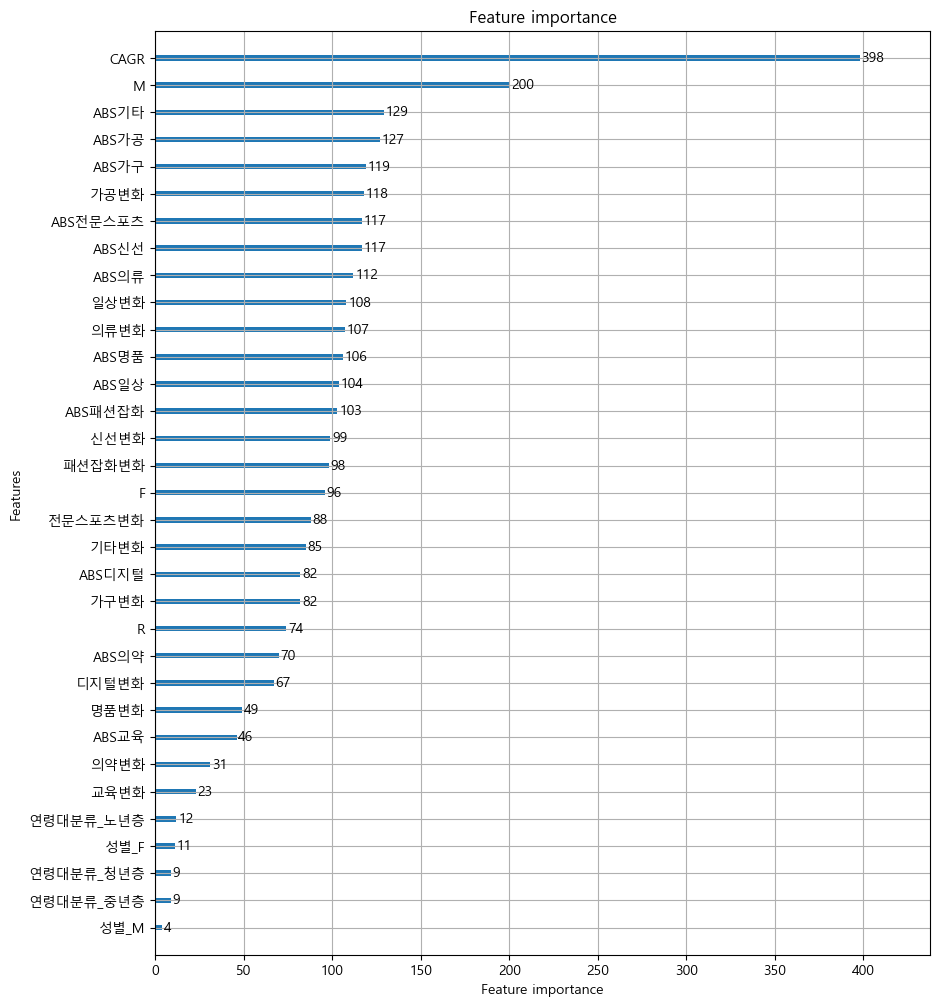

In [16]:
fig, ax = plt.subplots(figsize = (10, 12))
plot_importance(lgbm, ax = ax)
plt.savefig("lightgbm_feature_importance.tif", format = "tif", dpi = 300, bbox_inches = "tight")

In [17]:
params = {"learning_rate" : [0.01, 0.05, 0.1, 1, 5],
         "n_estimators" : [50, 100, 500, 1000],
         "max_depth" : [3, 5, 7, 10]}

grid = GridSearchCV(lgbm, param_grid=params, cv=3, refit=True)
grid.fit(X_train, y_train)
print('GridSearchCV 최적 파라미터:', grid.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid.best_score_))

GridSearchCV 최적 파라미터: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}
GridSearchCV 최고 정확도: 0.7829


In [18]:
pd.set_option("display.max_columns", None)
traindata

,성별,연령대분류,가공변화,신선변화,일상변화,의약변화,교육변화,디지털변화,가구변화,의류변화,전문스포츠변화,패션잡화변화,명품변화,기타변화,ABS가공,ABS신선,ABS일상,ABS의약,ABS교육,ABS디지털,ABS가구,ABS의류,ABS전문스포츠,ABS패션잡화,ABS명품,ABS기타,R,F,M,CAGR,LABEL
0,M,노년층,-3,0,-7,0,0,0,0,0,-3,-6,8,0,3,14,11,14,0,18,20,0,19,12,24,4,3,4,1,-8.17,1
1,M,노년층,-9,-1,0,9,0,-9,-9,0,-1,-1,0,-9,9,1,0,9,0,27,25,4,3,5,18,13,1,4,1,-12.04,0
2,M,노년층,0,-1,0,0,0,0,0,0,0,0,0,-3,4,5,2,0,0,16,0,6,0,0,0,3,6,5,10,3.54,0
3,F,노년층,1,2,2,0,0,0,0,2,-2,-3,0,0,13,12,14,14,0,0,18,4,4,15,0,34,8,3,6,8.20,0
4,M,노년층,-2,-5,-9,6,0,0,0,-4,-6,-5,0,0,14,9,25,6,0,16,18,18,18,7,16,14,1,2,7,-10.54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,F,청년층,0,0,8,8,0,0,0,5,0,0,0,6,0,0,8,8,0,16,0,5,0,16,0,6,6,1,10,9.41,0
19379,F,청년층,0,0,5,8,0,0,0,0,0,4,0,0,0,0,9,8,16,16,0,0,0,4,0,0,6,1,10,7.41,0
19380,F,중년층,5,9,1,7,0,0,8,3,5,3,0,5,5,9,1,7,0,0,8,9,5,7,0,5,6,3,10,9.91,0
19381,F,중년층,4,5,2,9,0,0,6,0,6,0,0,0,4,5,2,9,0,0,6,6,6,8,0,0,6,3,10,9.08,0


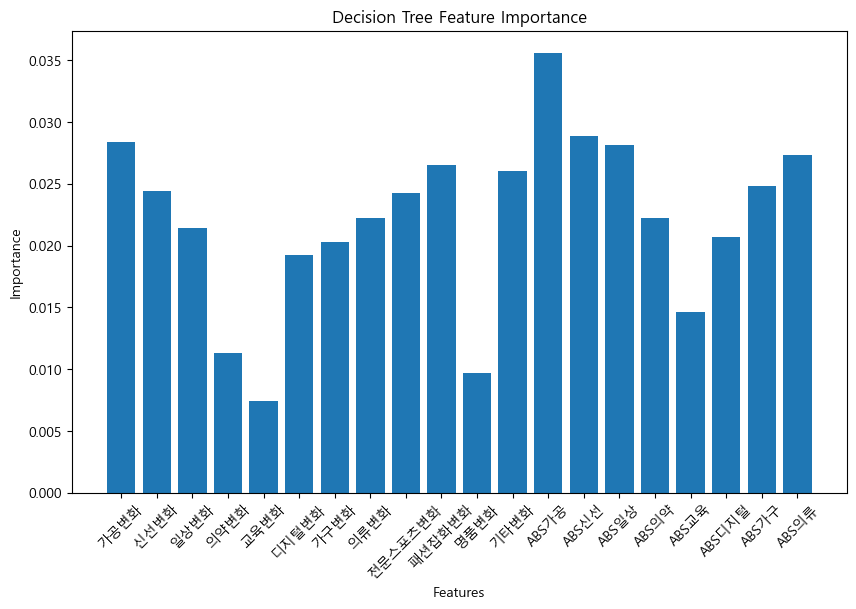

In [19]:
feature_importance_dt = dt.feature_importances_[:20]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_dt)), feature_importance_dt)
plt.xticks(range(len(feature_importance_dt)), X_train.columns[:20], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

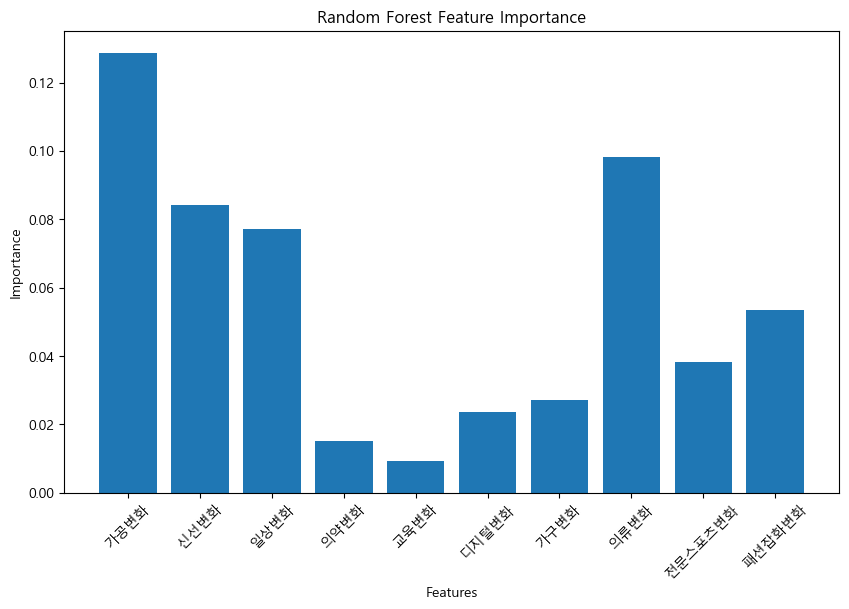

In [69]:
feature_importance_rf = rf.feature_importances_[:10]
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance_rf)), feature_importance_rf)
plt.xticks(range(len(feature_importance_rf)), X_train.columns[:10], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()